In [17]:
#load in the dataset witht the smFISH ratio results 

import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 7
plt.rcParams['font.sans-serif'] = 'Arial'


In [5]:
#read in the datadset as pandas pd

df_smFISH=pd.read_csv("data/smFISHscores-no-date-seperation.csv")
df_smFISH.head()

,Unnamed: 0,Polarity_Score,Group
0,1,0.040165,Gadph
1,2,0.030351,Gadph
2,3,0.217293,Emg1
3,4,0.019265,Emg1
4,5,-0.459187,Cyb5r3


ValueError: Could not interpret input 'mRNA'

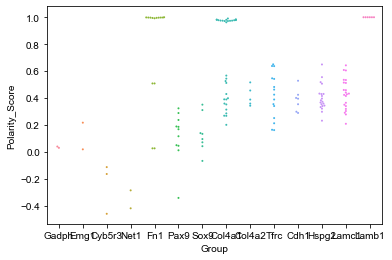

In [7]:
import seaborn as sns
sns.set_style({'font.sans-serif': 'Arial'})


ax1 = sns.swarmplot(df_smFISH.Group, df_smFISH.Polarity_Score, size=2)    
ax2 = sns.pointplot(x="mRNA", y="Polarity-Score", ci="sd", capsize=.2, scale=.5, join=False, color="Gray")


In [1]:
!mkdir figures

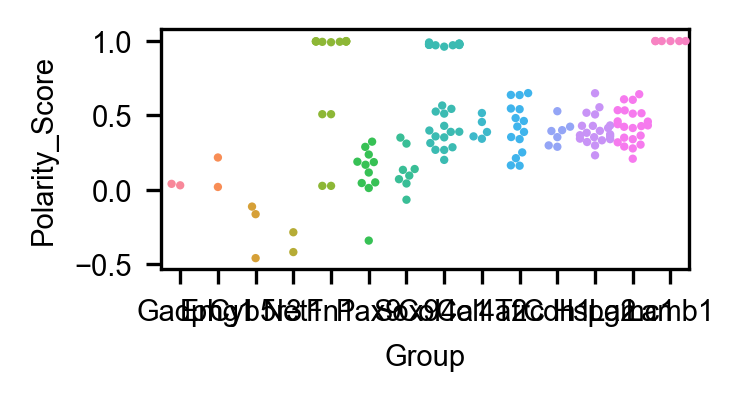

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(2.2,1.0), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

sns.swarmplot(x='Group', y='Polarity_Score', data=df_smFISH, size=2)
for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig("figures/smFISH_polarity.svg")

In [29]:
def plotSwarm(groups, counts, outputFigPath, fig_width=2.5, fig_height=1.0):
    '''plot swarm and error bar of curvature counting data, save .svg as outputFigPath
    
    Note: error bar here is standard deviation
    '''
    
    fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    sns.swarmplot(groups, counts, size=2)    
    sns.pointplot(groups, counts,
                  ci=95, capsize=.2, errwidth=.7,
                  markers='_', scale=.5, join=False, color="Gray")

    plt.xlabel("Groups")
    plt.ylabel("Polarity Index")
    plt.ylim([-.8, .8])
    for o in fig.findobj():
        o.set_clip_on(False)
    for o in ax.findobj():
        o.set_clip_on(False)
    

    plt.savefig(outputFigPath)
    
    return ax


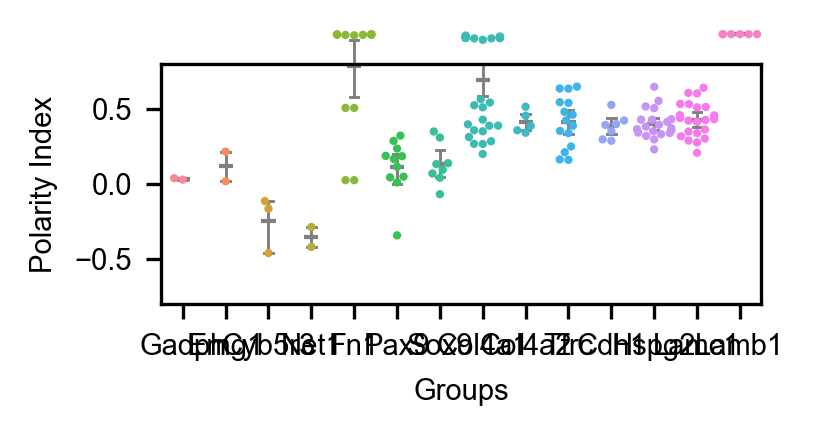

In [30]:
#outputFigPath = "./jupyter_figures/" + outputPrefix + "-curvature-swarm.svg"
#plotCurvatureSwarm(groups, counts, outputFigPath)

plotSwarm(df_smFISH.Group, df_smFISH.Polarity_Score, "figures/smFISH_polarity.svg")